## Metric-Visualizer Cola-lab Tutorial

In [1]:
!pip install -e ..
# !pip install metric_visualizer

Obtaining file:///C:/Users/chuan/OneDrive%20-%20University%20of%20Exeter/Works/MVis
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: metric-visualizer
    Found existing installation: metric-visualizer 0.8.0
    Uninstalling metric-visualizer-0.8.0:
      Successfully uninstalled metric-visualizer-0.8.0
  Running setup.py develop for metric-visualizer


### Metrics Logging
This example shows how to log metrics into metric-visualizer

In [2]:
import os
import random

import findfile

from metric_visualizer import MetricVisualizer
import numpy as np

MV = MetricVisualizer(name="example", trial_tag="Model")

# 随机指标模拟
repeat = 100  # number of repeats of each trial i.e., 每个实验模型/算法/目标/etc的重复次数
metric_num = 2  # number of metrics in each trial  i.e., 每个模型/算法/目标/etc的指标总数

trial_names = ['NSGA-II', 'NSGA-III', 'MOEA/D']  # fake trial names

for r in range(repeat):  # repeat the experiments to plot violin or box figure
    metrics = [
        (np.random.random() + n + (1 if random.random() > 0.5 else -1))
        for n in range(metric_num)
    ]  # n is metric scale factor
    for n_trial in range(len(trial_names)):
        for i, m in enumerate(metrics):
            MV.log_metric(
                trial_name="Trial-{}".format(n_trial),
                metric_name="metric{}".format(i + 1),
                value=m * random.random(),
            )  # add metric by custom name and value


### Metrics Summary
This example shows how to view simple metrics statistics

In [3]:
# MV.remove_outliers()  # remove outliers for each metric, do not use this unless you have to

MV.summary(save_path='./example.summary.txt', no_print=False)

MV.to_execl(save_path="example.xlsx")  # save summary to excel
# other usages
# MV.to_csv()
# MV.to_txt()
# MV.to_json()
# MV.to_latex()


 ----------------------------------- Metric Visualizer ----------------------------------- 
╒══════════╤═════════╤══════════════════════════════════════════════════════════════════╤═══════════╤══════════╤═══════╤═══════╤═══════╤═══════╕
│ Metric   │ Trial   │ Values                                                           │  Average  │  Median  │  Std  │  IQR  │  Min  │  Max  │
╞══════════╪═════════╪══════════════════════════════════════════════════════════════════╪═══════════╪══════════╪═══════╪═══════╪═══════╪═══════╡
│ metric1  │ Trial-0 │ [-0.52, 0.73, 0.46, -0.35, 1.06, -0.81, 0.88, -0.15, 0.79, 0.39] │   0.37    │   0.19   │ 0.64  │ 0.97  │ -0.81 │ 1.75  │
├──────────┼─────────┼──────────────────────────────────────────────────────────────────┼───────────┼──────────┼───────┼───────┼───────┼───────┤
│ metric1  │ Trial-1 │ [-0.35, 0.73, 0.27, -0.08, 0.59, -0.17, 0.27, -0.01, 0.19, 1.26] │   0.39    │   0.22   │ 0.63  │ 0.97  │ -0.55 │ 1.78  │
├──────────┼─────────┼───────────────

c:\users\chuan\onedrive - university of exeter\works\mvis\metric_visualizer\core.py:1213: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
C:\Users\chuan\AppData\Local\Temp\ipykernel_19924\3764945472.py:5: ResourceWarning: unclosed file <_io.BufferedWriter name='C:\\Users\\chuan\\OneDrive - University of Exeter\\Works\\MVis\\example/example.xlsx'>
  MV.to_execl(save_path="example.xlsx")  # save summary to excel


### Metrics Visualization
This example shows how to visualize and compare the performance between different trials

#### Box Plot by Tikz


    \documentclass{article}
    \usepackage{pgfplots}
    \usepackage{tikz}
    \usepackage{caption}
    \usetikzlibrary{intersections}
    \usepackage{helvet}
    \usepackage[eulergreek]{sansmath}
    \usepackage{amsfonts,amssymb,amsmath,amsthm,amsopn}	% math related
    \usetikzlibrary{patterns}
    \begin{document}

        \begin{figure}
        \centering

        % This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{black6463}{RGB}{6,46,3}
\definecolor{gray}{RGB}{128,128,128}
\definecolor{lightgray204}{RGB}{204,204,204}
\definecolor{silver}{RGB}{192,192,192}

\begin{axis}[
legend cell align={left},
legend style={fill opacity=0.8, draw opacity=1, text opacity=1, draw=lightgray204},
tick align=outside,
tick pos=left,
x grid style={gray},
xlabel={Trial Name},
xmajorgrids,
xmin=-0.5, xmax=2.5,
xminorgrids,
xtick style={color=black},
xtick={0,1,2},
xticklabels={Trial-0,Trial-1,Trial-2},
y grid style={gray},
ylabel={Metric Value},
ymajorgrids,
ymin=-1.100

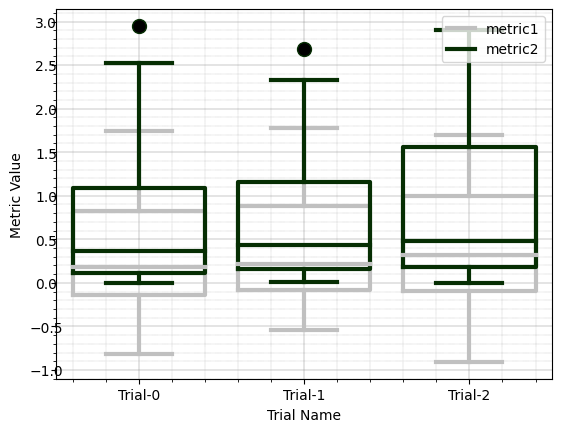

In [4]:
fig_path = MV.box_plot(
    engine="tikz",
    save_path="box_plot_by_trial.tex",
)

#### Important: Reformat to Cola-lab Template
**Tip: Use default matplotlib setting and fine-tune the tikz styles will be better**
Step1: Find a tikz plot template
Step2: Get a tex plot file to reformat
Step3: Fine-tune the plot tikz style settings
Step4: Reformat
Here is the full example:


    \documentclass{article}
    \usepackage{pgfplots}
    \usepackage{tikz}
    \usepackage{caption}
    \usetikzlibrary{intersections}
    \usepackage{helvet}
    \usepackage[eulergreek]{sansmath}
    \usepackage{amsfonts,amssymb,amsmath,amsthm,amsopn}	% math related
    \usetikzlibrary{patterns}
    \begin{document}

        \begin{figure}
        \centering

        % This file was created with tikzplotlib v0.10.1.
\begin{tikzpicture}

\definecolor{gray}{RGB}{128,128,128}
\definecolor{khaki23822091}{RGB}{238,220,91}
\definecolor{lightgray204}{RGB}{204,204,204}
\definecolor{plum196142253}{RGB}{196,142,253}

\begin{axis}[
legend cell align={left},
legend style={fill opacity=0.8, draw opacity=1, text opacity=1, draw=lightgray204},
tick align=outside,
tick pos=left,
x grid style={gray},
xlabel={Trial Name},
xmajorgrids,
xmin=-0.5, xmax=2.5,
xminorgrids,
xtick style={color=black},
xtick={0,1,2},
xticklabels={Trial-0,Trial-1,Trial-2},
y grid style={gray},
ylabel={Metric Value},
ymajorgri

1

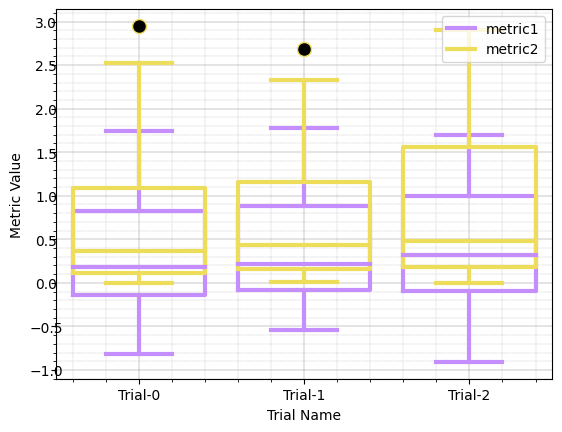

In [5]:
from metric_visualizer import reformat_tikz_format_for_colalab

# Step1: Let us use the template ./delta_hv.tex (Please find a suitable template based on your data)
tex_template_path = './delta_hv.tex'

# Step2: Get a tex plot file
fig_path = MV.box_plot(
    engine="tikz",
    save_path="box_plot_by_trial.tex",
)

# Step3: Fine-tune the plot tikz style settings, these style settings will be written into tikz source code. So only tikz grammar is allowed
# e.g.,
style_settings = {
    'xtick': {0, 1, 2},  # to be written as xtick = {0,1,2} in .tex file
    'font': r'\LARGE',  # to be written as font=\LARGE in .tex file
    'legend pos': 'south east', # to be written as legend pos=south east in .tex file
    'line width': '2pt',
    'xlabel': 'Algorithm',
    'ylabel': 'HV',
}

# Step4: Reformat
pdf_path = reformat_tikz_format_for_colalab(
    template=tex_template_path,     # can be a file path or text source texts
    tex_src_to_format=fig_path,     # can be a file path or text source texts
    output_path=fig_path,           # can be a file path
    style_settings=style_settings,
)
os.system('xdg-open "{}"'.format(pdf_path))  # for linux
os.system(r'explorer "file:{}"'.format(pdf_path))  # for windows

#### Box Plot by Matplotlib
You need to install latex and compile the tex source file to get the tikz plots

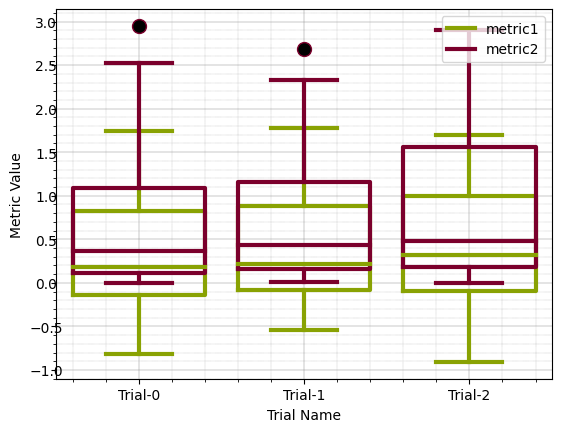

In [6]:
tikz_file_path = MV.box_plot(
    show=True,
    save_path="box_plot_by_trial.png",
)
MV.compile_tikz(crop=True,clean=True)

#### You can also plot by metrics
All features are available for metric-based visualizations

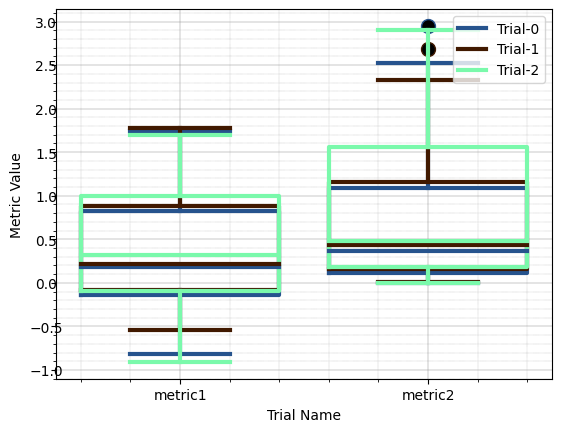

In [7]:
fig_path = MV.box_plot(
    by='metric',
    show=True,
    save_path="box_plot_by_trial.png",
)

#### Other Available Plots

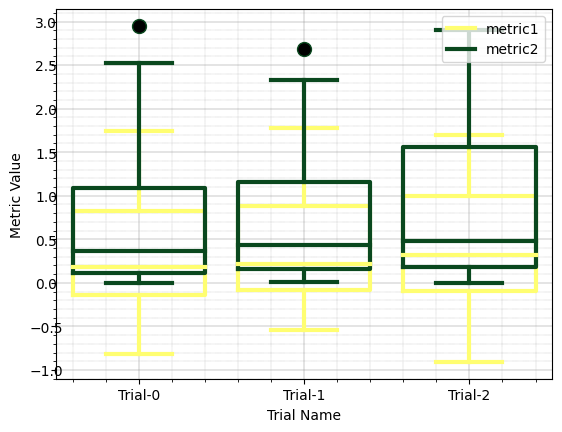

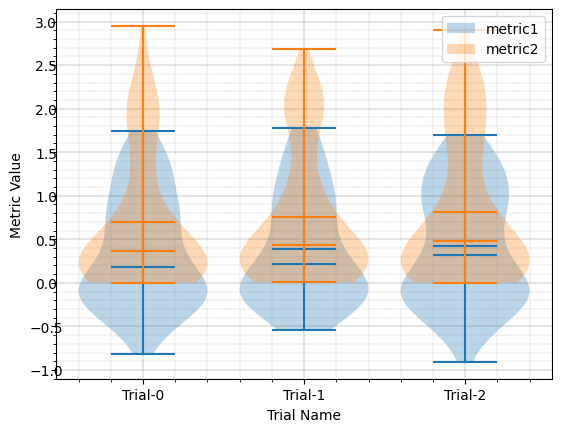

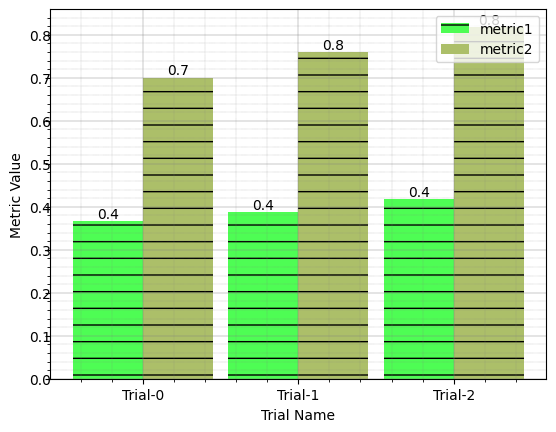

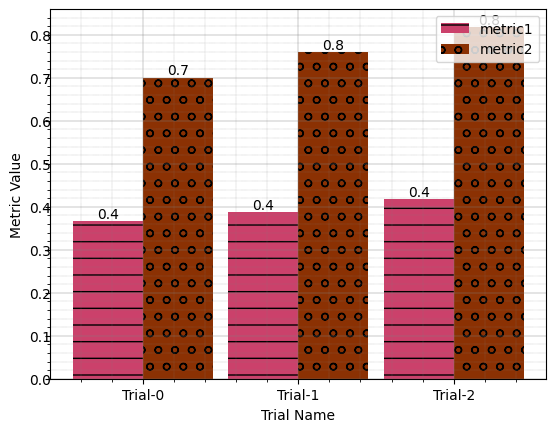

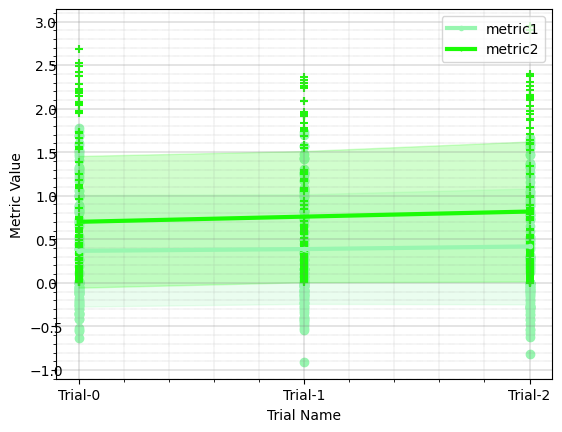

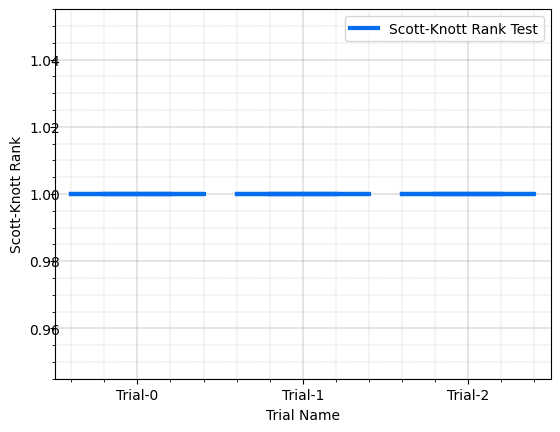

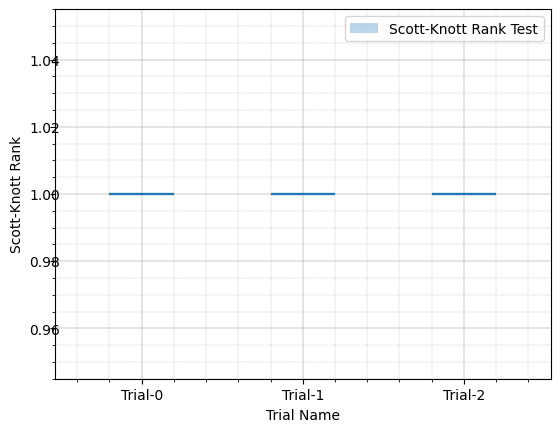

ImportError: You need to 
1): install R programming language (https://cran.r-project.org/mirrors.html).
2): install "effsize" by R prompt: 
install.packages("effsize")
3): pip install rpy2


In [8]:
MV.box_plot(by="trial", show=True)
MV.violin_plot(by="trial", show=True)
MV.bar_plot(by="trial", show=True)
MV.bar_plot(by="trial", show=True)
MV.trajectory_plot(by="trial", show=True)
MV.sk_rank_plot(plot_type="box", show=True)
MV.sk_rank_plot(plot_type="violin", show=True)
MV.a12_bar_plot(show=True)


MV.summary(dump_path=os.getcwd())
MV.box_plot(
    by="trial",
    engine="tikz",
    show=True,
    save_path="box_plot_by_trial.tex",
)
MV.violin_plot(
    by="trial",
    engine="tikz",
    show=True,
    save_path="violin_plot_by_trial.tex",
)
MV.bar_plot(
    by="trial",
    engine="tikz",
    show=True,
    save_path="bar_plot_by_trial.tex",
)
MV.bar_plot(
    by="trial",
    engine="tikz",
    show=True,
    save_path="bar_plot_by_trial.tex",
)
MV.trajectory_plot(
    by="trial",
    engine="tikz",
    show=True,
    save_path="trajectory_plot_by_trial.tex",
)
MV.sk_rank_plot(
    plot_type="box",
    engine="tikz",
    show=True,
    save_path="sk_rank_plot_box.tex",
)
MV.sk_rank_plot(
    plot_type="violin",
    engine="tikz",
    show=True,
    save_path="sk_rank_plot_violin.tex",
)
MV.a12_bar_plot(
    plot_type="violin",
    engine="tikz",
    show=True,
    save_path="sk_rank_plot_violin.tex",
)

### Wilcoxon Rank Test (Mann Whitney U test)
This example shows how to get the rank test results

#### Rank by Trial

In [10]:
rank_test_results = MV.rank_test_by_trail(trial='Trial-1', rank_type="two-sided")  # rank_type = {'two-sided', 'less', 'greater'}, optional. i.e., the alternative param in scipy.stats.ranksum
print(rank_test_results)


{'metric1<->metric2': RanksumsResult(statistic=-4.024261497096694, pvalue=5.715438300685857e-05), 'metric2<->metric1': RanksumsResult(statistic=4.024261497096694, pvalue=5.715438300685857e-05)}


In [9]:
rank_test_results = MV._rank_test_by_trial(rank_type="two-sided")  # his will give you all rank test results
print(rank_test_results)

{'Trial-0': {'metric1<->metric2': RanksumsResult(statistic=-3.4671688308319424, pvalue=0.0005259714172693648), 'metric2<->metric1': RanksumsResult(statistic=3.4671688308319424, pvalue=0.0005259714172693648)}, 'Trial-1': {'metric1<->metric2': RanksumsResult(statistic=-4.024261497096694, pvalue=5.715438300685857e-05), 'metric2<->metric1': RanksumsResult(statistic=4.024261497096694, pvalue=5.715438300685857e-05)}, 'Trial-2': {'metric1<->metric2': RanksumsResult(statistic=-3.718837886205931, pvalue=0.00020014144326807205), 'metric2<->metric1': RanksumsResult(statistic=3.718837886205931, pvalue=0.00020014144326807205)}}


#### Rank by Metric

In [9]:
rank_test_results = MV.rank_test_by_metric(rank_type="greater")  # rank_type = {'two-sided', 'less', 'greater'}, optional. i.e., the alternative param in scipy.stats.ranksum
print(rank_test_results)
# rank_test_results = MV._rank_test_by_metric(rank_type="greater")

{'metric1': {'Trial-0<->Trial-1': RanksumsResult(statistic=0.24678227759973653, pvalue=0.4025383633964189), 'Trial-0<->Trial-2': RanksumsResult(statistic=0.22967855538985382, pvalue=0.40917077989231004), 'Trial-1<->Trial-0': RanksumsResult(statistic=-0.24678227759973653, pvalue=0.5974616366035811), 'Trial-1<->Trial-2': RanksumsResult(statistic=0.019547111097008834, pvalue=0.4922023274950604), 'Trial-2<->Trial-0': RanksumsResult(statistic=-0.22967855538985382, pvalue=0.5908292201076899), 'Trial-2<->Trial-1': RanksumsResult(statistic=-0.019547111097008834, pvalue=0.5077976725049397)}, 'metric2': {'Trial-0<->Trial-1': RanksumsResult(statistic=-0.2638859998096193, pvalue=0.6040661180403519), 'Trial-0<->Trial-2': RanksumsResult(statistic=-0.19302772208296226, pvalue=0.5765313713658602), 'Trial-1<->Trial-0': RanksumsResult(statistic=0.2638859998096193, pvalue=0.395933881959648), 'Trial-1<->Trial-2': RanksumsResult(statistic=0.08796199993653976, pvalue=0.464953439343645), 'Trial-2<->Trial-0':

### Load Metric-Visualizer File Anywhere
You can load a ".mv" file or a list of ".mv" files to merge example results, this is useful when you have to run experiments iteratively.

In [11]:
mvs = findfile.find_cwd_files(['.mv'], exclude_key=['.pdf', 'png', '.aux', '.log', '.txt'])
loaded_mv = MetricVisualizer.load(mvs)

loaded_mv.summary()

Load example.mv

 ----------------------------------- Metric Visualizer ----------------------------------- 
╒══════════╤═════════╤══════════════════════════════════════════════════════════════════╤═══════════╤══════════╤═══════╤═══════╤═══════╤═══════╕
│ Metric   │ Trial   │ Values                                                           │  Average  │  Median  │  Std  │  IQR  │  Min  │  Max  │
╞══════════╪═════════╪══════════════════════════════════════════════════════════════════╪═══════════╪══════════╪═══════╪═══════╪═══════╪═══════╡
│ metric1  │ Trial-0 │ [-0.52, 0.73, 0.46, -0.35, 1.06, -0.81, 0.88, -0.15, 0.79, 0.39] │   0.37    │   0.19   │ 0.64  │ 0.97  │ -0.81 │ 1.75  │
├──────────┼─────────┼──────────────────────────────────────────────────────────────────┼───────────┼──────────┼───────┼───────┼───────┼───────┤
│ metric1  │ Trial-1 │ [-0.35, 0.73, 0.27, -0.08, 0.59, -0.17, 0.27, -0.01, 0.19, 1.26] │   0.39    │   0.22   │ 0.63  │ 0.97  │ -0.55 │ 1.78  │
├──────────┼─────────

c:\users\chuan\onedrive - university of exeter\works\mvis\metric_visualizer\core.py:1323: ResourceWarning: unclosed file <_io.BufferedReader name='example.mv'>
  mv = pickle.load(open(fn, mode="rb"))


'\n ----------------------------------- Metric Visualizer ----------------------------------- \n╒══════════╤═════════╤══════════════════════════════════════════════════════════════════╤═══════════╤══════════╤═══════╤═══════╤═══════╤═══════╕\n│ Metric   │ Trial   │ Values                                                           │  Average  │  Median  │  Std  │  IQR  │  Min  │  Max  │\n╞══════════╪═════════╪══════════════════════════════════════════════════════════════════╪═══════════╪══════════╪═══════╪═══════╪═══════╪═══════╡\n│ metric1  │ Trial-0 │ [-0.52, 0.73, 0.46, -0.35, 1.06, -0.81, 0.88, -0.15, 0.79, 0.39] │   0.37    │   0.19   │ 0.64  │ 0.97  │ -0.81 │ 1.75  │\n├──────────┼─────────┼──────────────────────────────────────────────────────────────────┼───────────┼──────────┼───────┼───────┼───────┼───────┤\n│ metric1  │ Trial-1 │ [-0.35, 0.73, 0.27, -0.08, 0.59, -0.17, 0.27, -0.01, 0.19, 1.26] │   0.39    │   0.22   │ 0.63  │ 0.97  │ -0.55 │ 1.78  │\n├──────────┼─────────┼──────

### Load Metric-Visualizer File from Console or Bash

```bash
mvis *.mv
```